# 概率

机器学习就是做出预测

## 基本概率论

概率估计值/**频率**：事件出现的次数 / 测试总数

大数定律：随着测试总数增加，估计值会接近概率

统计学中，从从概率分布中抽取样本的过程称为**抽样(sampling)**，可以把**分布(distribution)**看作对事件的概率分配，将概率分配给一些离散选择的分布称为**多项分布(multinomial distribution)**

In [ ]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

# 概率向量，模拟投色子，每个结果概率都是1/6
fair_probs = torch.ones(6) / 6
# 根据概率抽取样本 (抽样个数, 概率向量)
# 输出和概率向量相同长度的向量，每个元素表示该位置选中的次数
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [9]:
# 模拟1000次投掷
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1680, 0.1660, 0.1690, 0.1740, 0.1660, 0.1570])

对比真实概率1/6(大概0.167)，1000的结果基本接近

可以通过可视化看频率随随着时间的推移收敛到真实概率，进行500组实验，每组抽取10个样本

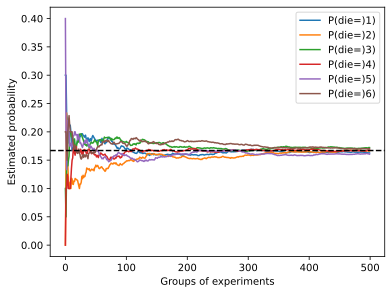

In [ ]:
# 500组实验，每组10个样本：得到(500,6)的矩阵
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
# 累计求和：按行(dim=0)累计求和
# i从0开始 cum_counts[i+1] += cum_counts[i]
cum_counts = counts.cumsum(dim=0)
# 计算累计频率
# cum_counts.sum(dim=1, keepdims=True)计算到该组总共抽了多少个样本
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))

for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=)" + str(i+1) + ")"))

# 绘制真实概率水平线（1/6≈0.167）
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')

d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

在处理骰子掷出时，集合S={1,2,3,4,5,6}称为**样本空间(sample space)**或**结果空间(outcome space)**，其中每个元素都是**结果(outcome)**

**事件(event)**是一组给定样本空间的随机结果

<img src="img/1-6/1.png" alt="概率" width="600">

**随机变量(random variable)**：取值在样本空间
  - 离散随机变量：取值离散
  - 连续随机变量：取值连续

## 多个随机变量

**联合概率(joint probability)**：P(A=a,B=b)表示同时满足的概率
  - P(A=a,B=b) <= P(A=a)

**条件概率**：P(AB)/P(A)表示在A发生的前提下，AB同时发生的概率
  - 0 <= P(AB)/P(A) <= 1

**贝叶斯定理**：根据乘法法则计算条件概率

<img src="img/1-6/2.png" alt="贝叶斯定理" width="300">

**边际化**：求和法则，即B的概率相当于计算A的所有可能选择。边际化结果的概率或分布称为**边际概率**或**边际分布**

<img src="img/1-6/3.png" alt="边际化" width="300">

**独立性**：如果两个随机变量A和B是独立的，意味着事件A的发生跟B事件的发生无关

<img src="img/1-6/4.png" alt="独立性" width="600">

## 期望与方差

<img src="img/1-6/5.png" alt="期望与方差" width="600">
